In [37]:
### QUESTION 3 ###

import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram, plot_state_city

# Create a quantum circuit with 4 qubits
qc_qft = QuantumCircuit(4)

## NOTE: at the end of all this, you will have to swap the order of the output qubits
#        to get it into its original state vector ordering!

### QUBIT 0 (technically represents Qubit 3, or Qubit 4 with base-1 indexing) ###
# Apply a Hadamard gate to qubit 0
qc_qft.h(0)

#################################################################################
# Apply the Controlled-Phase (or "CP") gates for qubit 0,
# with it as the target qubit and qubits 1, 2, and then 3,
# respectively, as the control qubits, in that order, applying
# a phase of:
#    ( 1   0                                   )
#    ( 0   e^(2*pi*i*2^(-<base-1 qubit number distance away>))
# to it. ########################################################################
# In the "QuantumCircuit.cp()" function, the first argument is THETA (the degree
# of rotation), the second argument is the CONTROL qubit, and the third argument
# is the TARGET qubit.
#################################################################################
qc_qft.cp(np.pi/2, 1, 0) #note that we use pi/2 here, even though it is technically: 2*pi*(2^-2), because that is simpler and requires fewer computations for the computer
qc_qft.cp(np.pi/4, 2, 0) #note that we use pi/4 here, even though it is technically: 2*pi*(2^-3), because that is simpler and requires fewer computations for the computer
qc_qft.cp(np.pi/8, 3, 0) #note that we use pi/8 here, even though it is technically: 2*pi*(2^-4), because that is simpler and requires fewer computations for the computer

### QUBIT 1 (technically represents State 2, or Qubit 3 with base-1 indexing) ###
# Apply a Hadamard gate to qubit 1
qc_qft.h(1)

# Apply the Controlled-Phase (or "CP") gates for qubit 1, with it as the target qubit
# and qubits 2 and then 3, respectively, as the control qubits, in that order
qc_qft.cp(np.pi/2, 2, 1)
qc_qft.cp(np.pi/4, 3, 1)

### QUBIT 2 (technically represents State 1, or Qubit 2 with base-1 indexing) ###
# Apply a Hadamard gate to qubit 2
qc_qft.h(2)

# Apply the Controlled-Phase (or "CP") gates for qubit 2, with it as the target qubit
# and qubit 3 as the control qubit
qc_qft.cp(np.pi/2, 3, 2)

### QUBIT 3 (technically represents State 0, or Qubit 1 with base-1 indexing) ###
# Apply a Hadamard gate to qubit 1
qc_qft.h(3)

## NOW, that "NOTE" from earlier comes into play - SWAP the qubits' order to get the
#  state vector back into its true ordering from top-to-bottom on the circuit! (i.e.,
#  |psi_1 psi_2 psi_3 ... psi_n> with the circuit channel lines read from top-to-bottom
#  instead of |psi_n psi_(n-1) psi_(n-2) ... psi_1>, since the latter is what we have it
#  in right now...)
qc_qft.swap(0, 3) # SWAP the first and fourth qubits
qc_qft.swap(1, 2) # SWAP the second and third qubits

In [38]:
# Draw the circuit
print(qc_qft.draw())

     ┌───┐                                                                     »
q_0: ┤ H ├─■────────■─────────────■────────────────────────────────────────────»
     └───┘ │P(π/2)  │       ┌───┐ │                                            »
q_1: ──────■────────┼───────┤ H ├─┼────────■────────■───────────────────────X──»
                    │P(π/4) └───┘ │        │P(π/2)  │       ┌───┐           │  »
q_2: ───────────────■─────────────┼────────■────────┼───────┤ H ├─■─────────X──»
                                  │P(π/8)           │P(π/4) └───┘ │P(π/2) ┌───┐»
q_3: ─────────────────────────────■─────────────────■─────────────■───────┤ H ├»
                                                                          └───┘»
«        
«q_0: ─X─
«      │ 
«q_1: ─┼─
«      │ 
«q_2: ─┼─
«      │ 
«q_3: ─X─
«        


In [39]:
### State Vector Simulation of Q3:
from qiskit.quantum_info import Statevector
state_vec = Statevector.from_label('0000')
print(state_vec)

Statevector([1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j],
            dims=(2, 2, 2, 2))


In [40]:
new_state_vec = state_vec
new_state_vec = new_state_vec.evolve(qc_qft)
print(new_state_vec)

Statevector([0.25+0.j, 0.25+0.j, 0.25+0.j, 0.25+0.j, 0.25+0.j, 0.25+0.j,
             0.25+0.j, 0.25+0.j, 0.25+0.j, 0.25+0.j, 0.25+0.j, 0.25+0.j,
             0.25+0.j, 0.25+0.j, 0.25+0.j, 0.25+0.j],
            dims=(2, 2, 2, 2))


In [41]:
# Simulate the QFT circuit
simulator = Aer.get_backend("qasm_simulator")

# Measure every qubit in the circuit
qc_qft.measure_all()

# Compile (or I guess "transpile") the circuit for the circuit-running simulator
transpiled_qft_qc = transpile(qc_qft, simulator)
sim_result = simulator.run(transpiled_qft_qc).result()

{'1010': 63, '0001': 64, '0100': 57, '0111': 64, '1111': 67, '0000': 62, '1011': 76, '0010': 69, '1110': 73, '0011': 66, '1100': 75, '1001': 67, '0101': 59, '1000': 55, '1101': 57, '0110': 50}


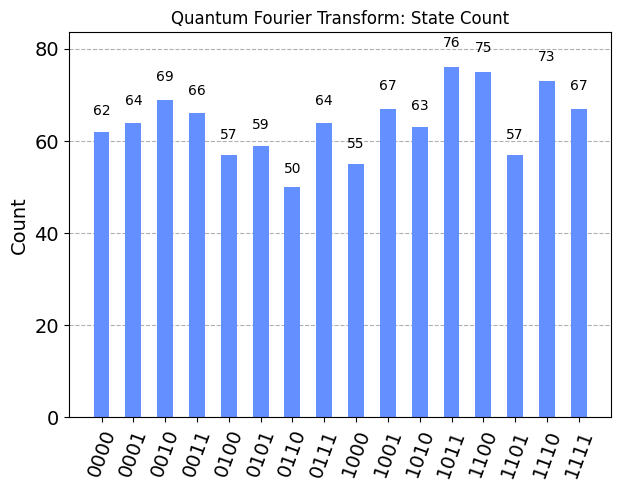

In [42]:
# Plot the results
state_counts = sim_result.get_counts(qc_qft)
print(state_counts)
plot_histogram(state_counts, title="Quantum Fourier Transform: State Count")

In [ ]:
"""
-------Q3 'Ordered List of Gates'-------
Gate List:
CP = 'Controlled Phase' -> 1s along the diagonal from top left to
                            bottom right until you get to the very bottom
                            right, and there instead is an
                            e to the i*theta = 2pi*i*2^(-something), 
                            and then 0s everywhere else;
                            is a 4x4 operator.
SWAP = swap gate, matrix representation is:
                    ( 1 0 0 0 )
                    ( 0 0 0 1 )
                    ( 0 0 0 1 )
                    ( 0 0 1 0 ).
H = Hadamard gate, matrix representation is:
                    ( 1/sqrt(2) 1/sqrt(2)  )
                    ( 1/sqrt(2) -1/sqrt(2) )
.

In order, the gates applied are:
On qubit 1 (technically qubit for state 4, but placed on top for convenience):
H -> 
CP with theta = pi/2, i.e. k = 2 (basically an S gate) ->
CP with theta = pi/4, i.e. k = 3 (basically a T gate) ->
CP with theta = pi/8, i.e. k = 4.
Then, gates are applied on qubit 2 (technically qubit for state 3):
H ->
CP with theta = pi/2, i.e. k = 2 (basically an S gate) ->
CP with theta = pi/4, i.e. k = 3 (basically a T gate).
Then, gates are applied on qubit 3 (technically qubit for state 2):
H ->
CP with theta = pi/2, i.e. k = 2 (basically an S gate).
Then, a gate is applied on qubit 4 (technically qubit for state 1):
just an H.
Then, on qubits 1 and 4, a SWAP gate is applied between them, switching each qubit's
individual state. Then, a similar thing is done, just with qubits 2 and 3 this time.
(The order of these last two steps does not really matter, you can SWAP qubits 1 and 4
before 2 and 3 or vice versa.)
"""

In [ ]:
"""
NOTE About the Fourier Basis:
The quantum Fourier transform, or QFT, takes an input set of qubits, i.e. an input state
vector, usually in the typical qubit state basis composed of |0>s and |1>s, then outputs
the state measurements instead as AMPLITUDE measurements, so that one can obtain the
periods from the output amplitudes.
These amplitudes exist on the Fourier quantum orthogonal basis, which for one qubit is:
{ |+>, |-> }
otherwise known as the state vectors that result from a single Hadamard gate applied to
the typical one-qubit orthogonal basis vectors |0> and |1>, respectively.
Thus, while a |0> on the Bloch sphere is denoted by an arrow pointing up to the top of
the Bloch sphere and a |1> down respectively, the |+> and |-> (i.e. the Fourier basis
versions of these typical one-qubit basis vectors) point directly in the directions of
the positive x and negative x solely along the x axis, respectively. Each variation of
input state and each additional qubit in the QFT affects the amount to which the output
Fourier basis vector has its phase shifted (i.e. rotated) about the z axis.
With four qubits, the typical phase shift (i.e. rotation) about the z axis is as follows:
qubit 0: 30 degrees; pi/6 rads
qubit 1: 45 degrees; pi/4 rads
qubit 2: 90 degrees; pi/2 rads
qubit 3: 180 degrees; pi rads
as you go down from left-to-right along the basis vectors for the typical four-qubit
orthonormal basis ({ |0000>, |0001>, ... , |1111> }).

Therefore, the measurements observed above for the four-qubit QFT are seemingly normal
given that the output qubits when measured are expected to be in superpositions due to
the Hadamard gates and entanglement due to the Controlled-Phase, or CP, gates. Each
output state has a relatively similar amount of measured qubits relative to any given
other output state, which is what one would expect from a superposition being applied to
each qubit and then each qubit being entangled with each other qubit.

Sources:
- https://www.youtube.com/watch?v=mAHC1dWKNYE
- https://docs.quantum.ibm.com/api/qiskit/qiskit.circuit.library.QFT#layout
- https://quantumcomputing.stackexchange.com/questions/26329/why-do-we-need-to-reverse-the-order-of-qubits-in-quantum-fourier-transform
- https://quantumcomputing.stackexchange.com/questions/6399/quantum-fourier-transform-without-swaps
- https://github.com/Qiskit/textbook/blob/main/notebooks/ch-algorithms/quantum-fourier-transform.ipynb
"""

In [5]:
"""
Test to make sure I made the QFT circuit correctly:
"""
# import qiskit

# true_qft_qc = qiskit.circuit.library.QFT(
#     num_qubits=4, 
#     approximation_degree=0, 
#     do_swaps=True, 
#     inverse=False, 
#     insert_barriers=False, 
#     name="True correct QFT"
# )

# print(true_qft_qc.draw())

### END QUESTION 3 ###

'\nTest to make sure I made the QFT circuit correctly:\n'

In [79]:
### QUESTION 4 ###

qc_qft_inv = QuantumCircuit(4)

# Just a QFT circuit in reverse
qc_qft_inv.swap(1, 2)
qc_qft_inv.swap(0, 3)
qc_qft_inv.h(3)
qc_qft_inv.cp(-np.pi/2, 3, 2)
qc_qft_inv.h(2)
qc_qft_inv.cp(-np.pi/4, 3, 1)
qc_qft_inv.cp(-np.pi/2, 2, 1)
qc_qft_inv.h(1)
qc_qft_inv.cp(-np.pi/8, 3, 0)
qc_qft_inv.cp(-np.pi/4, 2, 0)
qc_qft_inv.cp(-np.pi/2, 1, 0)
qc_qft_inv.h(0)

In [80]:
qc_qft_inv.draw()

»
q_0: ────X──────────────────────────────────────────■──────────────■────────»
         │                                          │        ┌───┐ │        »
q_1: ─X──┼──────────────────────■─────────■─────────┼────────┤ H ├─┼────────»
      │  │                ┌───┐ │         │P(-π/2)  │        └───┘ │P(-π/4) »
q_2: ─X──┼───────■────────┤ H ├─┼─────────■─────────┼──────────────■────────»
         │ ┌───┐ │P(-π/2) └───┘ │P(-π/4)            │P(-π/8)                »
q_3: ────X─┤ H ├─■──────────────■───────────────────■───────────────────────»
           └───┘                                                            »
«               ┌───┐
«q_0: ─■────────┤ H ├
«      │P(-π/2) └───┘
«q_1: ─■─────────────
«                    
«q_2: ───────────────
«                    
«q_3: ───────────────
«

In [81]:
### State Vector Simulation of Q4:
from qiskit.quantum_info import Statevector
state_vec = Statevector.from_label('0000')
#state_vec = new_state_vec    #Just playing around
print(state_vec)

Statevector([1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j],
            dims=(2, 2, 2, 2))


In [82]:
new_state_vec = state_vec
new_state_vec = new_state_vec.evolve(qc_qft_inv)
print(new_state_vec)

Statevector([0.25+0.j, 0.25+0.j, 0.25+0.j, 0.25+0.j, 0.25+0.j, 0.25+0.j,
             0.25+0.j, 0.25+0.j, 0.25+0.j, 0.25+0.j, 0.25+0.j, 0.25+0.j,
             0.25+0.j, 0.25+0.j, 0.25+0.j, 0.25+0.j],
            dims=(2, 2, 2, 2))


In [83]:
# Simulate the QFT circuit
simulator = Aer.get_backend("qasm_simulator")

# Measure every qubit in the circuit
qc_qft_inv.measure_all()

# Compile (or I guess "transpile") the circuit for the circuit-running simulator
transpiled_qc_qft_inv = transpile(qc_qft_inv, simulator)
sim_result = simulator.run(transpiled_qc_qft_inv).result()

{'1100': 56, '0011': 63, '0010': 65, '1011': 67, '1010': 56, '0110': 59, '1101': 64, '0000': 71, '1001': 53, '1111': 76, '0101': 55, '1110': 63, '0100': 75, '1000': 56, '0001': 80, '0111': 65}


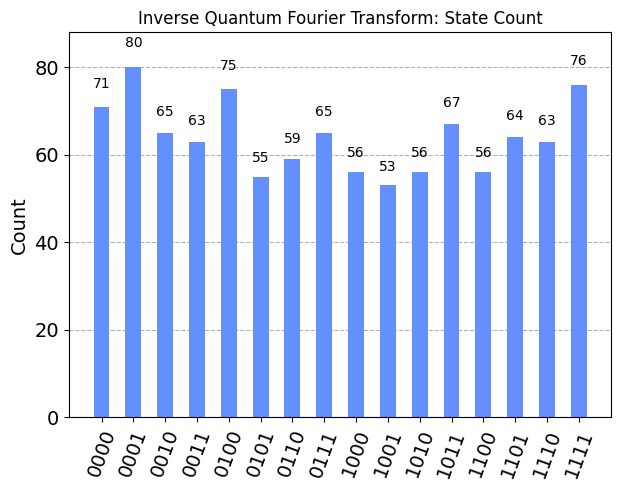

In [84]:
# Plot the results
state_counts = sim_result.get_counts(qc_qft_inv)
print(state_counts)
plot_histogram(state_counts, title="Inverse Quantum Fourier Transform: State Count")

In [85]:
### QUESTION 5 ###

# Concatenate the two Quantum Circuits
# (I tried using the "compose" function, but it injected "measure" gates, which messed
#  with trying to get the Statevector at the end)
qc_qft_final = QuantumCircuit(4)
qc_qft_final.h(0)
qc_qft_final.cp(np.pi/2, 1, 0) #note that we use pi/2 here, even though it is technically: 2*pi*(2^-2), because that is simpler and requires fewer computations for the computer
qc_qft_final.cp(np.pi/4, 2, 0) #note that we use pi/4 here, even though it is technically: 2*pi*(2^-3), because that is simpler and requires fewer computations for the computer
qc_qft_final.cp(np.pi/8, 3, 0) #note that we use pi/8 here, even though it is technically: 2*pi*(2^-4), because that is simpler and requires fewer computations for the computer
qc_qft_final.h(1)
qc_qft_final.cp(np.pi/2, 2, 1)
qc_qft_final.cp(np.pi/4, 3, 1)
qc_qft_final.h(2)
qc_qft_final.cp(np.pi/2, 3, 2)
qc_qft_final.h(3)
qc_qft_final.swap(0, 3) # SWAP the first and fourth qubits
qc_qft_final.swap(1, 2) # SWAP the second and third qubits
qc_qft_final.swap(1, 2)
qc_qft_final.swap(0, 3) #<-- You can see how this series of four swaps essentially does nothing!
qc_qft_final.h(3)
qc_qft_final.cp(-np.pi/2, 3, 2)
qc_qft_final.h(2)
qc_qft_final.cp(-np.pi/4, 3, 1)
qc_qft_final.cp(-np.pi/2, 2, 1)
qc_qft_final.h(1)
qc_qft_final.cp(-np.pi/8, 3, 0)
qc_qft_final.cp(-np.pi/4, 2, 0)
qc_qft_final.cp(-np.pi/2, 1, 0)
qc_qft_final.h(0)

In [86]:
# Draw the concatenation
qc_qft_final.draw()

┌───┐                                                                     »
q_0: ┤ H ├─■────────■─────────────■────────────────────────────────────────────»
     └───┘ │P(π/2)  │       ┌───┐ │                                            »
q_1: ──────■────────┼───────┤ H ├─┼────────■────────■───────────────────────X──»
                    │P(π/4) └───┘ │        │P(π/2)  │       ┌───┐           │  »
q_2: ───────────────■─────────────┼────────■────────┼───────┤ H ├─■─────────X──»
                                  │P(π/8)           │P(π/4) └───┘ │P(π/2) ┌───┐»
q_3: ─────────────────────────────■─────────────────■─────────────■───────┤ H ├»
                                                                          └───┘»
«                                                                     »
«q_0: ─X─────X──────────────────────────────────────────■─────────────»
«      │     │                                          │        ┌───┐»
«q_1: ─┼──X──┼──────────────────────■─────────■─────────┼────────┤ H ├»
«      │  │  │                ┌───┐ │         │P(-π/2)  │        └───┘»
«q_2: ─┼──X──┼───────■────────┤ H ├─┼─────────■─────────┼─────────────»
«      │     │ ┌───┐ │P(-π/2) └───┘ │P(-π/4)            │P(-π/8)      »
«q_3: ─X─────X─┤ H ├─■──────────────■───────────────────■─────────────»
«              └───┘                                                  »
«                         ┌───┐
«q_0: ─■─────────■────────┤ H ├
«      │         │P(-π/2) └───┘
«q_1: ─┼─────────■─────────────
«      │P(-π/4)                
«q_2: ─■───────────────────────
«                              
«q_3: ─────────────────────────
«

In [87]:
from qiskit.quantum_info import Statevector

In [88]:
state_vec = Statevector.from_label('0000')
print(state_vec)

Statevector([1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j],
            dims=(2, 2, 2, 2))


In [89]:
new_state_vec = state_vec
new_state_vec = new_state_vec.evolve(qc_qft_final)
print(new_state_vec)

Statevector([1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j],
            dims=(2, 2, 2, 2))


In [90]:
print(state_vec == new_state_vec)

True


In [91]:
# NOTICE HOW THE TWO STATE VECTORS ARE EQUAL, EVEN AT THE END OF THE CIRCUIT!!!

In [92]:
# Let's try it for other state vectors:

In [93]:
# |0001>
state_vec = Statevector.from_label('0001')
print(state_vec)
new_state_vec = state_vec
new_state_vec = new_state_vec.evolve(qc_qft_final)
print(new_state_vec)
print(state_vec == new_state_vec)

Statevector([0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j],
            dims=(2, 2, 2, 2))
Statevector([0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j],
            dims=(2, 2, 2, 2))
True


In [94]:
# |0010>
state_vec = Statevector.from_label('0010')
print(state_vec)
new_state_vec = state_vec
new_state_vec = new_state_vec.evolve(qc_qft_final)
print(new_state_vec)
print(state_vec == new_state_vec)

Statevector([0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j],
            dims=(2, 2, 2, 2))
Statevector([0.+0.000000e+00j, 0.+0.000000e+00j, 1.+4.357882e-33j,
             0.-4.357882e-33j, 0.+0.000000e+00j, 0.+0.000000e+00j,
             0.+0.000000e+00j, 0.+0.000000e+00j, 0.+0.000000e+00j,
             0.+0.000000e+00j, 0.+0.000000e+00j, 0.+0.000000e+00j,
             0.+0.000000e+00j, 0.+0.000000e+00j, 0.+0.000000e+00j,
             0.+0.000000e+00j],
            dims=(2, 2, 2, 2))
True


In [95]:
# |0011>
state_vec = Statevector.from_label('0011')
print(state_vec)
new_state_vec = state_vec
new_state_vec = new_state_vec.evolve(qc_qft_final)
print(new_state_vec)
print(state_vec == new_state_vec)

Statevector([0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j],
            dims=(2, 2, 2, 2))
Statevector([0.+0.000000e+00j, 0.+0.000000e+00j, 0.-4.357882e-33j,
             1.+4.357882e-33j, 0.+0.000000e+00j, 0.+0.000000e+00j,
             0.+0.000000e+00j, 0.+0.000000e+00j, 0.+0.000000e+00j,
             0.+0.000000e+00j, 0.+0.000000e+00j, 0.+0.000000e+00j,
             0.+0.000000e+00j, 0.+0.000000e+00j, 0.+0.000000e+00j,
             0.+0.000000e+00j],
            dims=(2, 2, 2, 2))
True


In [96]:
# |0100>
state_vec = Statevector.from_label('0100')
print(state_vec)
new_state_vec = state_vec
new_state_vec = new_state_vec.evolve(qc_qft_final)
print(new_state_vec)
print(state_vec == new_state_vec)

Statevector([0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j],
            dims=(2, 2, 2, 2))
Statevector([ 0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              1.00000000e+00+3.08148791e-33j,
             -1.11022302e-16+3.08148791e-33j,
              0.00000000e+00-3.08148791e-33j,
              0.00000000e+00-3.08148791e-33j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j],
            dims=(2, 2, 2, 2))
True


In [97]:
# |0101>
state_vec = Statevector.from_label('0101')
print(state_vec)
new_state_vec = state_vec
new_state_vec = new_state_vec.evolve(qc_qft_final)
print(new_state_vec)
print(state_vec == new_state_vec)

Statevector([0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j],
            dims=(2, 2, 2, 2))
Statevector([ 0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
             -1.11022302e-16+3.08148791e-33j,
              1.00000000e+00+3.08148791e-33j,
              0.00000000e+00-3.08148791e-33j,
              0.00000000e+00-3.08148791e-33j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j],
            dims=(2, 2, 2, 2))
True


In [98]:
# |0110>
state_vec = Statevector.from_label('0110')
print(state_vec)
new_state_vec = state_vec
new_state_vec = new_state_vec.evolve(qc_qft_final)
print(new_state_vec)
print(state_vec == new_state_vec)

Statevector([0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j,
             0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j],
            dims=(2, 2, 2, 2))
Statevector([ 0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00-3.08148791e-33j,
              0.00000000e+00-3.08148791e-33j,
              1.00000000e+00-8.63614149e-18j,
             -1.11022302e-16+8.63614149e-18j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j],
            dims=(2, 2, 2, 2))
True


In [99]:
# |0111>
state_vec = Statevector.from_label('0111')
print(state_vec)
new_state_vec = state_vec
new_state_vec = new_state_vec.evolve(qc_qft_final)
print(new_state_vec)
print(state_vec == new_state_vec)

Statevector([0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j],
            dims=(2, 2, 2, 2))
Statevector([ 0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00-3.08148791e-33j,
              0.00000000e+00-3.08148791e-33j,
             -1.11022302e-16+8.63614149e-18j,
              1.00000000e+00-8.63614149e-18j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j],
            dims=(2, 2, 2, 2))
True


In [100]:
# |1000>
state_vec = Statevector.from_label('1000')
print(state_vec)
new_state_vec = state_vec
new_state_vec = new_state_vec.evolve(qc_qft_final)
print(new_state_vec)
print(state_vec == new_state_vec)

Statevector([0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j],
            dims=(2, 2, 2, 2))
Statevector([ 0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              1.00000000e+00+1.96261557e-17j,
              1.11022302e-16-1.96261557e-17j,
             -5.73845151e-17+7.51060464e-18j,
             -2.11201079e-17-7.51060464e-18j,
             -9.81307787e-18-9.81307787e-18j,
             -9.81307787e-18-9.81307787e-18j,
              9.81307787e-18+9.81307787e-18j,
              9.81307787e-18+9.81307787e-18j],
            dims=(2, 2, 2, 2))
True


In [101]:
# |1001>
state_vec = Statevector.from_label('1001')
print(state_vec)
new_state_vec = state_vec
new_state_vec = new_state_vec.evolve(qc_qft_final)
print(new_state_vec)
print(state_vec == new_state_vec)

Statevector([0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j],
            dims=(2, 2, 2, 2))
Statevector([ 0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              1.11022302e-16-1.96261557e-17j,
              1.00000000e+00+1.96261557e-17j,
             -2.11201079e-17-7.51060464e-18j,
             -5.73845151e-17+7.51060464e-18j,
             -9.81307787e-18-9.81307787e-18j,
             -9.81307787e-18-9.81307787e-18j,
              9.81307787e-18+9.81307787e-18j,
              9.81307787e-18+9.81307787e-18j],
            dims=(2, 2, 2, 2))
True


In [102]:
# |1010>
state_vec = Statevector.from_label('1010')
print(state_vec)
new_state_vec = state_vec
new_state_vec = new_state_vec.evolve(qc_qft_final)
print(new_state_vec)
print(state_vec == new_state_vec)

Statevector([0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j],
            dims=(2, 2, 2, 2))
Statevector([ 0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
             -2.98790430e-18-1.50212093e-17j,
             -7.55167186e-17+1.50212093e-17j,
              1.00000000e+00+1.09900142e-17j,
              1.11022302e-16-1.09900142e-17j,
              9.81307787e-18+9.81307787e-18j,
              9.81307787e-18+9.81307787e-18j,
             -9.81307787e-18-9.81307787e-18j,
             -9.81307787e-18-9.81307787e-18j],
            dims=(2, 2, 2, 2))
True


In [103]:
# |1100>
state_vec = Statevector.from_label('1100')
print(state_vec)
new_state_vec = state_vec
new_state_vec = new_state_vec.evolve(qc_qft_final)
print(new_state_vec)
print(state_vec == new_state_vec)

Statevector([0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j],
            dims=(2, 2, 2, 2))
Statevector([ 0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              9.81307787e-18+9.81307787e-18j,
              9.81307787e-18+9.81307787e-18j,
             -9.81307787e-18-9.81307787e-18j,
             -9.81307787e-18-9.81307787e-18j,
              1.00000000e+00+9.38127079e-17j,
             -5.55111512e-17-6.31965379e-17j,
             -3.61413172e-17+2.84669268e-17j,
             -4.23633058e-17-5.90830968e-17j],
            dims=(2, 2, 2, 2))
True


In [104]:
# |1011>
state_vec = Statevector.from_label('1011')
print(state_vec)
new_state_vec = state_vec
new_state_vec = new_state_vec.evolve(qc_qft_final)
print(new_state_vec)
print(state_vec == new_state_vec)

Statevector([0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j],
            dims=(2, 2, 2, 2))
Statevector([ 0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
             -7.55167186e-17+1.50212093e-17j,
             -2.98790430e-18-1.50212093e-17j,
              1.11022302e-16-1.09900142e-17j,
              1.00000000e+00+1.09900142e-17j,
              9.81307787e-18+9.81307787e-18j,
              9.81307787e-18+9.81307787e-18j,
             -9.81307787e-18-9.81307787e-18j,
             -9.81307787e-18-9.81307787e-18j],
            dims=(2, 2, 2, 2))
True


In [105]:
# |1101>
state_vec = Statevector.from_label('1101')
print(state_vec)
new_state_vec = state_vec
new_state_vec = new_state_vec.evolve(qc_qft_final)
print(new_state_vec)
print(state_vec == new_state_vec)

Statevector([0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j,
             0.+0.j, 0.+0.j],
            dims=(2, 2, 2, 2))
Statevector([ 0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              9.81307787e-18+9.81307787e-18j,
              9.81307787e-18+9.81307787e-18j,
             -9.81307787e-18-9.81307787e-18j,
             -9.81307787e-18-9.81307787e-18j,
             -5.55111512e-17-6.31965379e-17j,
              1.00000000e+00+9.38127079e-17j,
             -4.23633058e-17-5.90830968e-17j,
             -3.61413172e-17+2.84669268e-17j],
            dims=(2, 2, 2, 2))
True


In [106]:
# |1110>
state_vec = Statevector.from_label('1110')
print(state_vec)
new_state_vec = state_vec
new_state_vec = new_state_vec.evolve(qc_qft_final)
print(new_state_vec)
print(state_vec == new_state_vec)

Statevector([0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             1.+0.j, 0.+0.j],
            dims=(2, 2, 2, 2))
Statevector([ 0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
             -9.81307787e-18-9.81307787e-18j,
             -9.81307787e-18-9.81307787e-18j,
              9.81307787e-18+9.81307787e-18j,
              9.81307787e-18+9.81307787e-18j,
             -7.55167186e-17-3.03292943e-17j,
             -2.98790430e-18-2.86875709e-19j,
              1.00000000e+00+6.67194350e-18j,
              0.00000000e+00+2.39442265e-17j],
            dims=(2, 2, 2, 2))
True


In [107]:
# |1111>
state_vec = Statevector.from_label('1111')
print(state_vec)
new_state_vec = state_vec
new_state_vec = new_state_vec.evolve(qc_qft_final)
print(new_state_vec)
print(state_vec == new_state_vec)

Statevector([0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 1.+0.j],
            dims=(2, 2, 2, 2))
Statevector([ 0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
             -9.81307787e-18-9.81307787e-18j,
             -9.81307787e-18-9.81307787e-18j,
              9.81307787e-18+9.81307787e-18j,
              9.81307787e-18+9.81307787e-18j,
             -2.98790430e-18-2.86875709e-19j,
             -7.55167186e-17-3.03292943e-17j,
              0.00000000e+00+2.39442265e-17j,
              1.00000000e+00+6.67194350e-18j],
            dims=(2, 2, 2, 2))
True


In [108]:
"""
While there are differences in the final state vectors in some cases, this can be chalked
 up to floating point error. The decimal values of the vector arguments that are changed
 are so small as to be almost irrelevant, being so close to 0 that can be considered
 approximately 0 (being 0 to the 15th decimal place after the decimal is small enough to
 be considered 0).
"""
### END QUESTION 5 ###

'\nWhile there are differences in the final state vectors in some cases, this can be chalked\n up to floating point error. The decimal values of the vector arguments that are changed\n are so small as to be almost irrelevant, being so close to 0 that can be considered\n approximately 0 (being 0 to the 15th decimal place after the decimal is small enough to\n be considered 0).\n'